# Математика для машинного обучения
## Домашнее задание №1

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнил: *(впишите сюда фамилию и имя)*

**Определение.** *$n$-мерным векторным (или линейным) пространством* $\mathbb R^n$ называется множество упорядоченных наборов из $n$ вещественных чисел $\{(x_1, x_2, \ldots, x_n)\mid x_1, \ldots, x_n \in \mathbb R^n\}$, на котором определены следующие операции:

1. Сложение двух векторов: если $u=(u_1, u_2, \ldots, u_n)$ и $v=(v_1, v_2, \ldots, v_n)$, то $u+v=(u_1+v_1, u_2+v_2, \ldots, u_n + v_n)$.

2. Умножения вектора на число: если $u=(u_1, u_2, \ldots, u_n)$ и $\lambda \in \mathbb R$ (то есть $\lambda$ — это просто число), то $\lambda u = (\lambda u_1, \lambda u_2, \ldots, \lambda u_n)$.

**Определение.** *Линейной комбинацией* векторов $u^1, u^2, \ldots, u^k$ называется любое выражение вида $\lambda_1 u^1 + \lambda_2 u^2 + \cdots + \lambda_k u^k$, где $\lambda_1, \lambda_2,\ldots, \lambda_k$ — какие-то числа. Линейная комбинация называется *нетривиальной*, если хотя бы одно $\lambda_j$ не равняется нулю.

Мы также будем использовать «школьное» понятие вектора на декартовой плоскости или в трёхмерном пространстве. С этой точки зрения
вектор — это отрезок, на котором задано направление. При этом мы считаем, что
вектор не меняется, если его параллельно перенести в другую точку, сохраняя
направление и длину.

Если начало вектора совпадает с
началом координат, то координаты вектора совпадают с координатами его конца. Координаты произвольного вектора можно вычислить как
покомпонентную разность между координатами конца и координатами начала. Если
$A=(a_1, a_2)$ и $B=(b_1, b_2)$, то $\overrightarrow{AB}=(b_1-a_1, b_2-a_2)$.

Таким образом множество векторов на двумерной плоскости отождествляется с множеством пар чисел $\mathbb R^2$. Аналогично множество векторов в трёхмерном пространстве отождествляется с множеством троек чисел $\mathbb R^3$.

### Задача 1

Рассмотрим картинку.

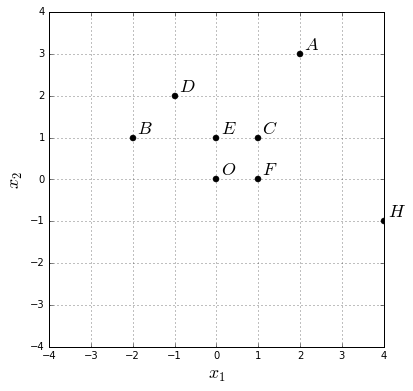

In [18]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
fig = plt.figure(figsize=(6,6))
fig.gca().grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)

points = [('O', 0, 0), ('A', 2, 3), ('B', -2, 1), ('C', 1, 1), ('D', -1, 2), ('E', 0, 1), ('F', 1, 0), ('H', 4, -1)]

plt.plot([p[1] for p in points], [p[2] for p in points], 'o', color='black')
for p in points:
    plt.text(p[1] + 0.1, p[2] + 0.1, "$%s$" % p[0], fontsize = 18)

1. Найти координаты вектора $\overrightarrow{AE}$.
1. Найти сумму $\overrightarrow{OC}+\overrightarrow{CD}$.
1. Найти сумму $\overrightarrow{OC}+\overrightarrow{OB}$.
2. Выразить вектор $\overrightarrow{OC}$ в виде линейной комбинации векторов $\overrightarrow{OE}$ и $\overrightarrow{OF}$.
3. Выразить вектор $\overrightarrow{OB}$ в виде линейной комбинации векторов $\overrightarrow{OC}$ и $\overrightarrow{FE}$.
4. Выразить вектор $\overrightarrow{FH}$ в виде линейной комбинации векторов $\overrightarrow{OC}$ и $\overrightarrow{FE}$.

**Утверждение.** Прямая, проходящая через точку $P$ в направлении вектора $u$ задаётся как множество точек $Q$, таких, что

$\overrightarrow{OQ} = \overrightarrow{OP} + tu$, где параметр $t$ пробегает множество всех вещественных чисел.

### Задача 2
Для той же картинки:
1. Записать в параметрическом виде уравнение прямой, проходящей через точки $B$ и $A$.
2. Записать в параметрическом виде уравнение прямой, проходящей через точки $D$ и $E$.
3. Найти координаты точки пересечения этих прямых, используя результаты двух предыдущих пунктов (записать систему уравнений, решить её и найти координаты точки пересечения).

### Задача 3
При каком условии на вектор $u=(u_1, u_2)$ прямая, параллельная вектору $u$, может быть задана в виде $x_2 = k x_1 + b$? Докажите.

**Определение.** *Скалярным произведением* векторов $u=(u_1, \ldots, u_n)$ и $v=(v_1, \ldots, v_n)$ будем называть число (скаляр), обозначаемое $(u, v)$ и равное $u_1 v_1 + u_2 v_2 + \ldots + u_n v_n$. Скалярное произведение также можно определить как $|u|\cdot |v|\cdot \cos \alpha$, где $\alpha$ — угол между векторами, $|u|$ и $|v|$ — их длины.

**Замечание.** Вообще говоря, скалярное произведение не всегда определяется координатной формулой, указанной выше: она справедлива только если система координат прямоугольная (вернее, базис ортонормирован). Но мы в основном будем работать именно с такими системами координат.

**Следствие из определения.** Векторы $u$ и $v$ перпендикулярны тогда и только тогда, когда их скалярное произведение равно нулю. (Нулевой вектор перпендикулярен чему угодно.)

### Задача 4
Доказать следующие свойства скалярного произведения:

Для любых трёх векторов $u, v, w$ и любого скаляра $\lambda$:

1. $(u + v, w) = (u, w) + (v, w)$;
2. $(u, v + w) = (u, v) + (u, w)$;
3. $(\lambda u, v) = \lambda (u, v)$;
4. $(u, \lambda v) = \lambda (u, v)$.

Эти свойства называются «билинейностью» (то есть линейности по обоим аргументам).

### Задача 5
При каком значении параметра $t$ векторы $u=(2, t)$ и $v=(4, -1)$

1. Параллельны;
2. Перпендикулярны?

### Задача 6
Описать множество всех векторов

1. параллельных;
2. перпрендикулярных

прямой, заданной уравнением $2x_1 + 3x_2 = \sqrt{\pi}$

**Определение.** Система векторов $u^1, u^2, \ldots, u^k$ называется *линейно независимой* (ещё говорят, что эти векторы являются линейно независимыми), если ни один из этих векторов не выражается в виде линейной комбинации остальных.

### Задача 7
Более традиционное определение линейной независимости звучит так:

Система векторов $u^1, u^2, \ldots, u^k$ называется *линейно независимой*, если никакая **нетривиальная** линейная комбинация этих векторов не равна нулевому вектору.

Докажите, что это определение эквивалентно данному выше (по крайней мере, если векторов больше одного).

### Задача 8
Являются ли следующие системы векторов линейно независимыми? Ответ обосновать.

1. $(1, 2)$, $(2,1)$.
2. $(1, 2)$, $(2, 3)$, $(3, 5)$.
2. $(1, 2)$, $(2, 3)$, $(\sqrt{\pi}, \sin e)$.
3. $(1, 0, 1)$, $(0, 1, 0)$, $(10, 3, 10)$.
4. $(1, 0, 0)$, $(0, 3, 0)$, $(0, 0, 2)$.
5. $(1, 2, 3, 4, 5)$, $(2, 4, 6, 8, 11)$.
6. $(1, 2, 3, 4, 5, 6)$, $(2, 3, 4, 5, 6, 7), (10, 10, 10, 10, 10, 10)$.

### Задача 9
Пусть система векторов $u^1, u^2, \ldots, u^k$ является линейно независимой. Пусть вектор $v$ представляется в виде линейной комбинации векторов $u^1, \ldots, u^k$, то есть $v = \lambda_1 u^1+\ldots + \lambda_k u^k$. Докажите, что в этом случае такая линейная комбинация единственна, то есть если $v = \mu_1 u^1 + \ldots + \mu_k u^k$, то $\lambda_1=\mu_1$, ..., $\lambda_k = \mu_k$.

Подсказка: воспользоваться определением из задачи 7.

### Задача 10
Рассмотрим плоскость в трёхмерном пространстве, проходящую через точку $P = (1, 1, 1)$ перпендикулярно вектору $n=(1, 2, 4)$.

1. Записать уравнение этой плоскости в виде $A_1 x_1 + A_2 x_2 + A_3 x_3 = D$.
2. Найти точки пересечени этой плоскости с осями координат.

### Задание 11
Рассмотрим плоскость в трёхмерном пространстве, проходящую через точки $P=(1, 0, 1)$, $S=(1, 1, 0)$ и $T=(0, 1, 1)$.

1. Записать уравнение этой плоскости в параметрическом виде (то есть описать координаты произвольной точки $Q$, зависящей от двух параметров).
2. Записать уравнение этой плоскости в виде $A_1 x_1 + A_2 x_3 + A_3 x_3 = D$.
3. Найти какой-нибудь вектор, перпендикулярный этой плоскости.

### Задача 12
С помощью `numpy` и `matplotlib.pyplot` построить график функции $y = \sin \exp x$ на отрезке $[-1,5]$.

In [39]:
# Впишите решение сюда

### Задача 13
Напишите каким-нибудь образом функцию, вычисляющую факториал целого числа (например, с помощью цикла или рекурсии). Сравните с помощью `%%timeit` скорость работы вашей функции с `math.factorial` для больших значений аргумента.

In [40]:
# Впишите решение сюда